In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
import pingouin as pg

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

colors = [
    'lightcoral', 'brown', 'lightseagreen', 'maroon', 'deeppink', 'darkorange', 'royalblue', 'darkviolet',
    'gold', 'crimson', 'lightsteelblue', 'salmon', 'mediumseagreen', 'olivedrab', 'blue', 'limegreen',
    'slateblue', 'red', 'steelblue', 'teal', 'peru', 'dimgray', 'violet', 'cyan'
]

In [2]:
df = pd.read_csv('./cleaned.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


### About the data
1. **Occupational hazards** are risks associated with working in specific occupations.
2. **Genetic risk** is the probability of the individual carrying a specific disease-associated mutation, or of being affected with a specific genetic disorder.
3. **Chronic Lung Disease** is a group of lung diseases that block airflow and make it difficult to breathe.
4. **Obesity** is a complex disease involving an excessive amount of body fat
5. **Fatigue** is a feeling overtired, with low energy and a strong desire to sleep that interferes with normal daily activities.
6. **Wheezing** is the shrill whistle or coarse rattle you hear when your airway is partially blocked.
6. **Nail clubbing** occurs when the tips of the fingers enlarge and the nails curve around the fingertip

In [3]:
# updating the column names
df.rename(columns=str.lower,inplace=True)
df.rename(columns={col: col.replace(' ','_') for col in df.columns},inplace=True)
df.head()


,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                  

In [5]:
print('Cancer Levels: ',df['level'].unique())
df['level'].replace({'Low': 0, 'Medium':1, 'High':2},inplace=True)
print('Cancer Levels: ',df['level'].unique())


Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [6]:
# df.describe().T
np.round(df.describe().T,3)

,count,mean,std,min,25%,50%,75%,max
age,1000.0,37.174,12.005,14.0,27.75,36.0,45.0,73.0
gender,1000.0,1.402,0.491,1.0,1.00,1.0,2.0,2.0
air_pollution,1000.0,3.840,2.030,1.0,2.00,3.0,6.0,8.0
alcohol_use,1000.0,4.563,2.620,1.0,2.00,5.0,7.0,8.0
dust_allergy,1000.0,5.165,1.981,1.0,4.00,6.0,7.0,8.0
occupational_hazards,1000.0,4.840,2.108,1.0,3.00,5.0,7.0,8.0
genetic_risk,1000.0,4.580,2.127,1.0,2.00,5.0,7.0,7.0
chronic_lung_disease,1000.0,4.380,1.849,1.0,3.00,4.0,6.0,7.0
balanced_diet,1000.0,4.491,2.136,1.0,2.00,4.0,7.0,7.0
obesity,1000.0,4.465,2.125,1.0,3.00,4.0,7.0,7.0


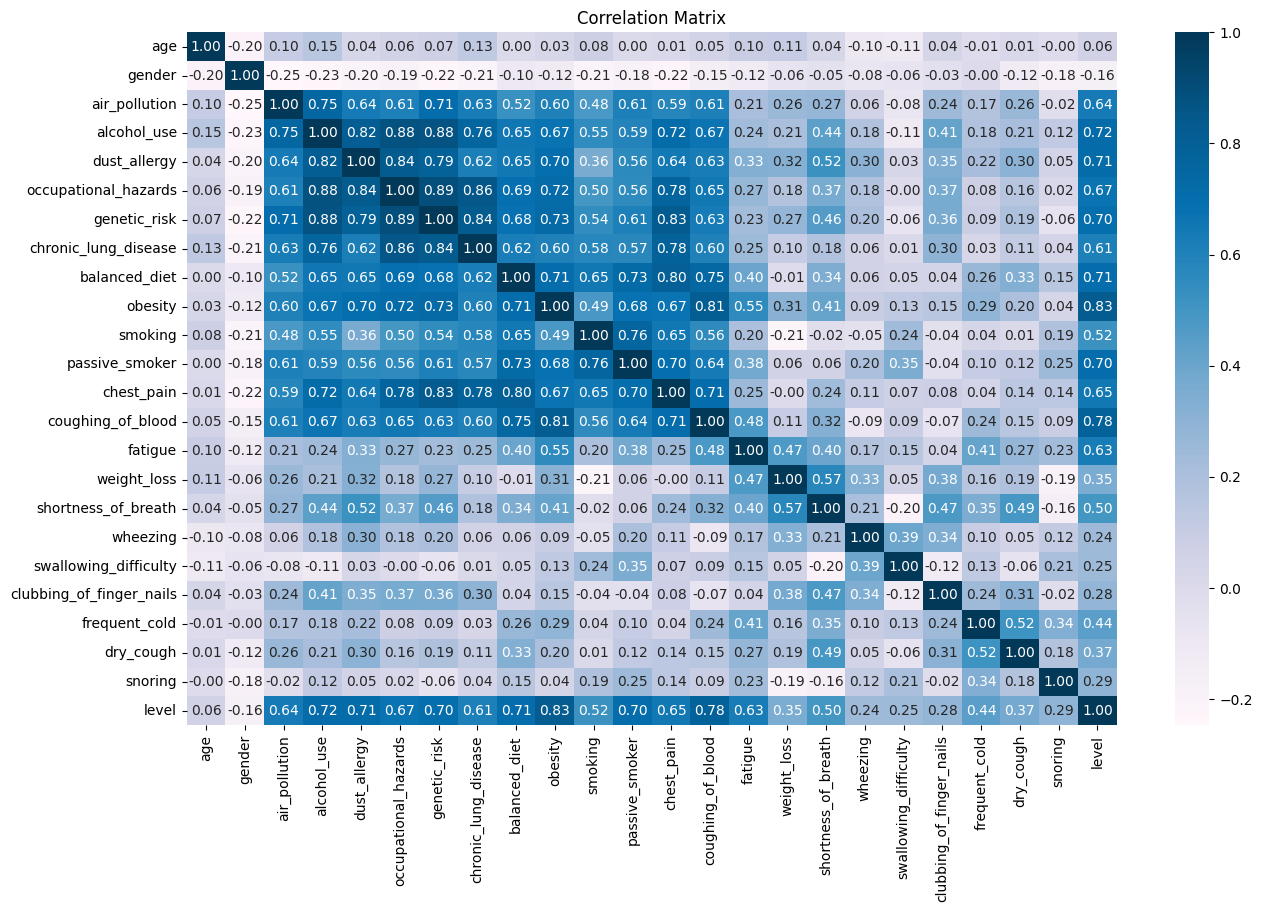

In [7]:
plt.figure(figsize=(15,9))
sb.heatmap(df.corr(),annot=True,fmt='.2f',cmap=plt.cm.PuBu)
plt.title('Correlation Matrix')
plt.show()


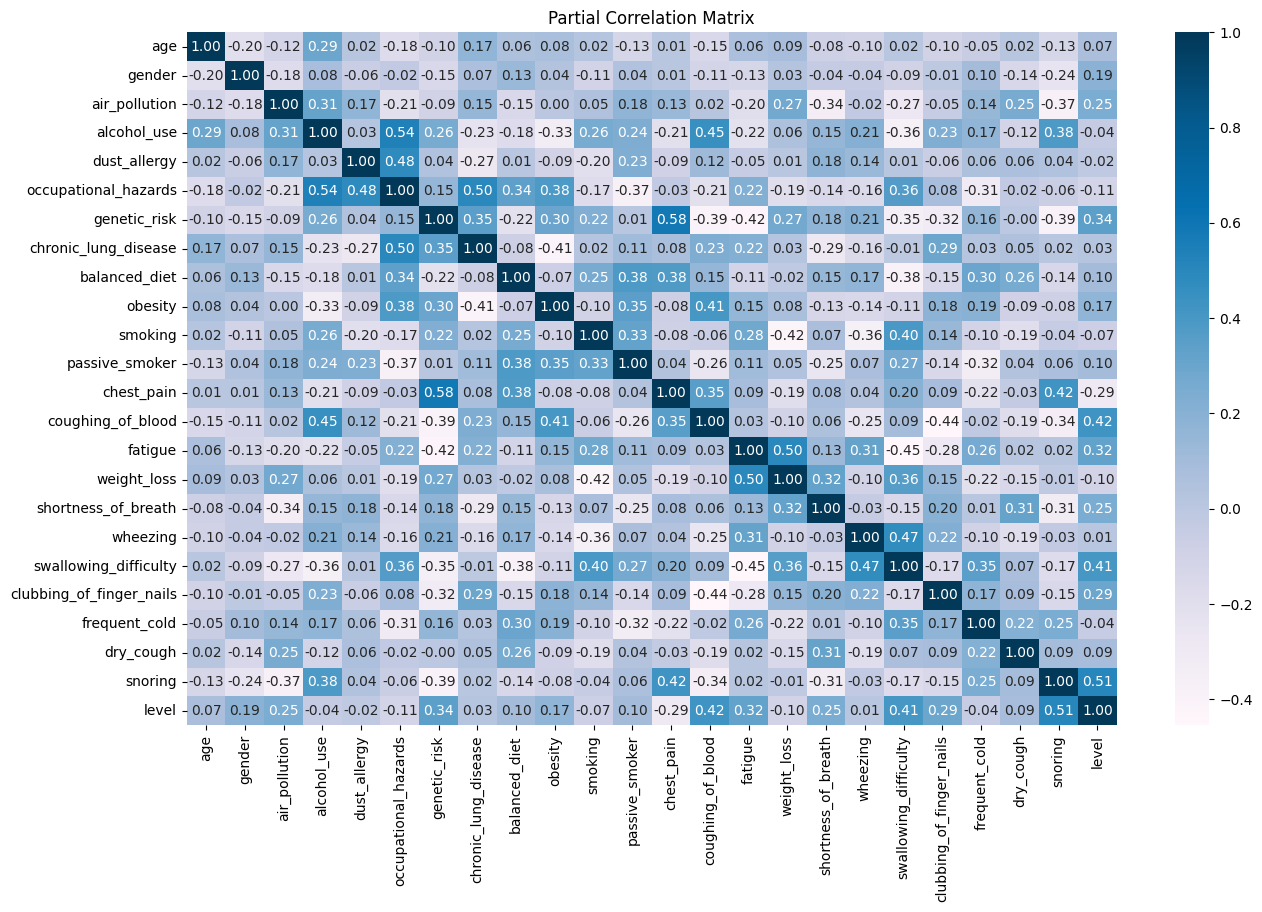

In [8]:
plt.figure(figsize=(15,9))
sb.heatmap(df.pcorr(),annot=True,fmt='.2f',cmap=plt.cm.PuBu)
plt.title('Partial Correlation Matrix')
plt.show()


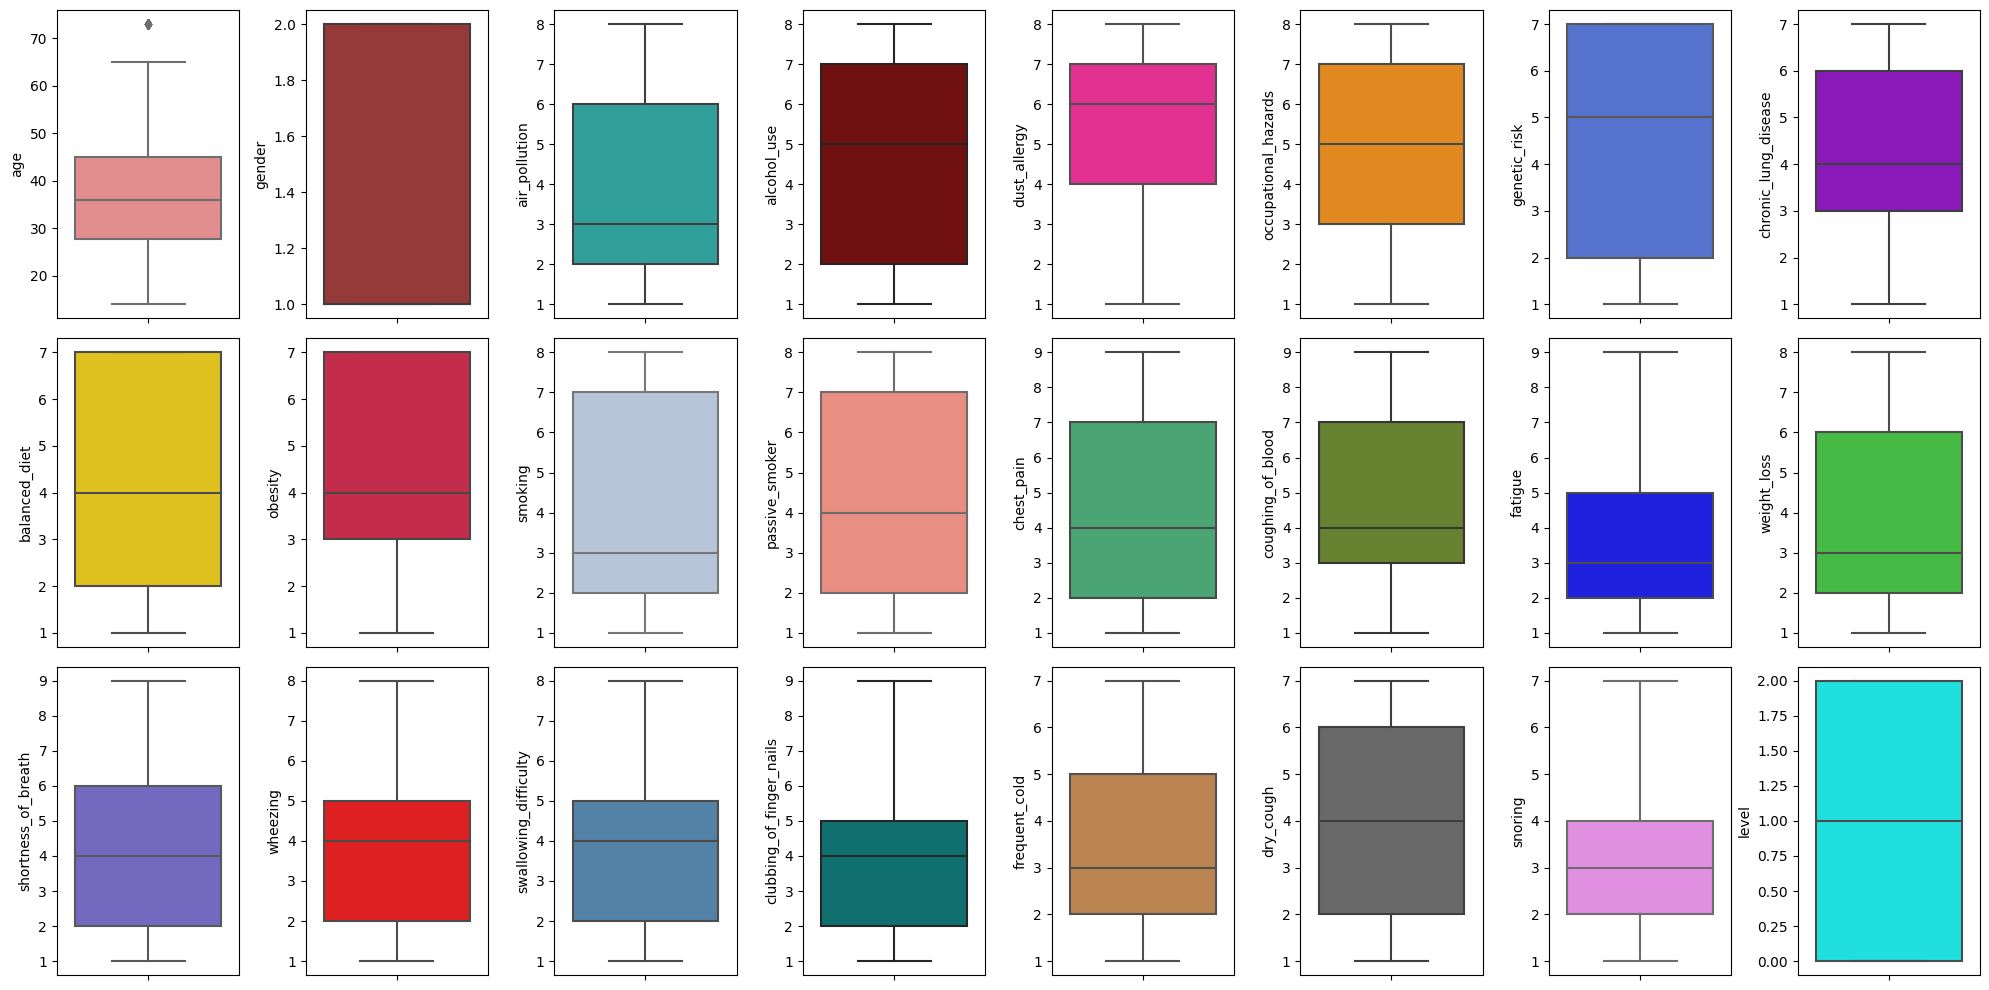

In [9]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()

for cnt,col in enumerate(df.columns):
    sb.boxplot(y=col, data=df, ax=ax[cnt],color=colors[cnt])
    
plt.tight_layout()
plt.show()


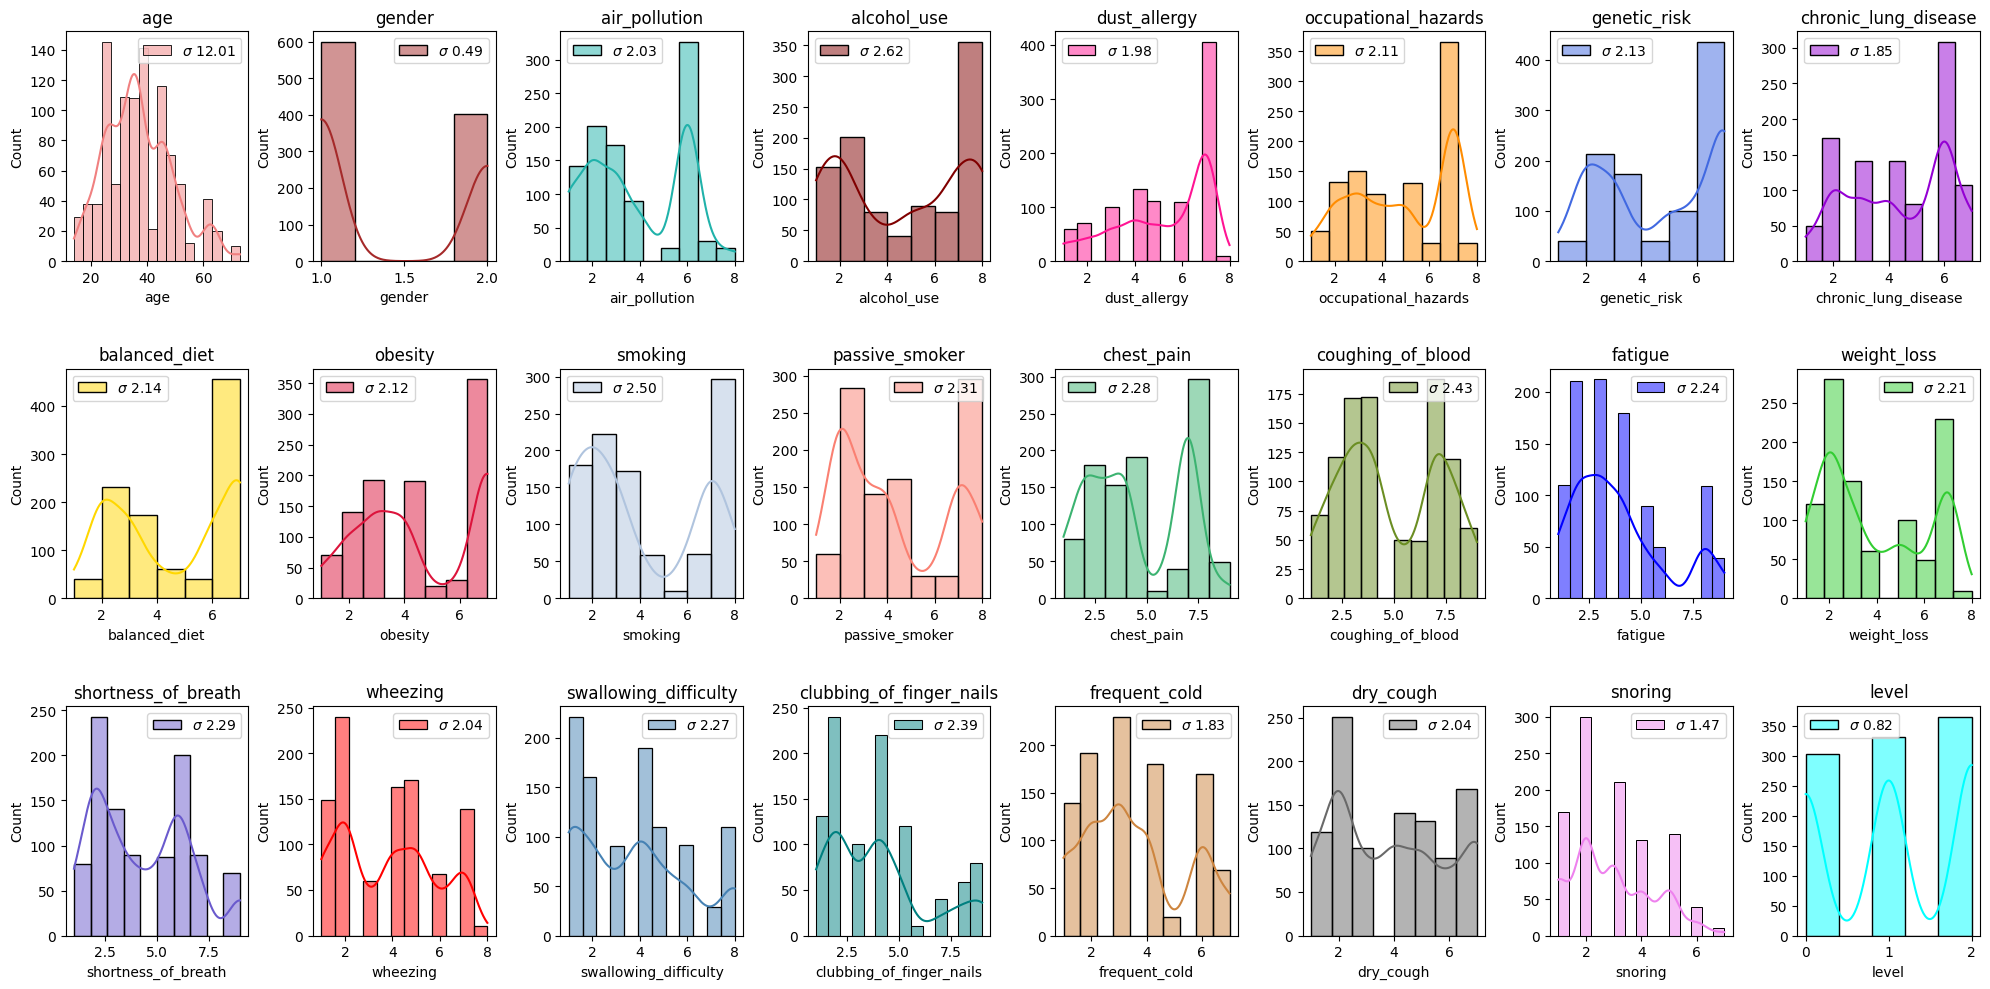

In [10]:
fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()

for i,(k, v) in enumerate(df.items()):
    sb.histplot(
        v, color=colors[i], kde=True, bins='fd', ax=ax[i], label=f'$\sigma$ {v.std():.2f}'
    )

    ax[i].set_title(f'{k}')
    ax[i].legend()

plt.tight_layout(w_pad=.2, h_pad=3)
plt.show()


In [11]:
[np.array(sorted(list(df[col].unique()))) for col in df.columns]


[array([14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55,
        61, 62, 63, 64, 65, 73]),
 array([1, 2]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 2, 3, 4, 5, 6, 8, 9]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 9]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5, 6, 7]),
 array([0, 1, 2])]

In [12]:
df.to_csv('./cleaned.csv',index=False)